# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-delta.new.72.fix.120.155.157'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

185

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

6

In [8]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

['Romania', 'Guinea', 'Senegal', 'Iran', 'United Arab Emirates']

,
 

10

: 

['Poland']

}

In [9]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Poland  1st    Past  23Apr2020  05May2020    37974750
        2nd    Past  06May2020  17May2020    37974750
        3rd    Past  18May2020  25May2020    37974750
        4th    Past  26May2020  05Jun2020    37974750
        5th    Past  06Jun2020  15Jun2020    37974750
        6th    Past  16Jun2020  25Jun2020    37974750
        7th    Past  26Jun2020  05Jul2020    37974750
        8th    Past  06Jul2020  16Jul2020    37974750
        9th    Past  17Jul2020  24Jul2020    37974750
        10th   Past  25Jul2020  02Aug2020    37974750

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [10]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


--------------------Romania--------------------


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	9th phase with SIR-F model finished 229 trials in 0 min 5 sec.

	1st phase with SIR-F model finished 190 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 183 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 195 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 189 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 222 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 219 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 224 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 225 trials in 0 min 5 sec.

Completed optimization. Total: 0 min 15 sec


--------------------Guinea--------------------


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	9th phase with SIR-F model finished 233 trials in 0 min 5 sec.

	1st phase with SIR-F model finished 222 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 224 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 224 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 221 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 225 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 423 trials in 0 min 10 sec.

	4th phase with SIR-F model finished 612 trials in 0 min 15 sec.

Completed optimization. Total: 0 min 20 sec


--------------------Senegal--------------------


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	9th phase with SIR-F model finished 444 trials in 0 min 10 sec.

	1st phase with SIR-F model finished 219 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 223 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 224 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 221 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 222 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 224 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 222 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 224 trials in 0 min 5 sec.

Completed optimization. Total: 0 min 20 sec


--------------------Poland--------------------


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	10th phase with SIR-F model finished 235 trials in 0 min 5 sec.

	1st phase with SIR-F model finished 218 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 221 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 221 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 221 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	9th phase with SIR-F model finished 236 trials in 0 min 5 sec.

Completed optimization. Total: 0 min 20 sec


--------------------Iran--------------------


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	9th phase with SIR-F model finished 233 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 218 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 222 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 221 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 220 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 222 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 228 trials in 0 min 5 sec.

	1st phase with SIR-F model finished 1971 trials in 1 min 0 sec.

Completed optimization. Total: 1 min 5 sec


--------------------United Arab Emirates--------------------


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	9th phase with SIR-F model finished 228 trials in 0 min 5 sec.

	1st phase with SIR-F model finished 220 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 218 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 221 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 216 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 420 trials in 0 min 10 sec.

	7th phase with SIR-F model finished 223 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 426 trials in 0 min 10 sec.

	8th phase with SIR-F model finished 226 trials in 0 min 5 sec.

Completed optimization. Total: 0 min 20 sec

In [11]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE       rho  \
Country Phase                                                            
Poland  1st    Past  23Apr2020  05May2020    37974750  SIR-F  0.010377   
        2nd    Past  06May2020  17May2020    37974750  SIR-F  0.007810   
        3rd    Past  18May2020  25May2020    37974750  SIR-F  0.009611   
        4th    Past  26May2020  05Jun2020    37974750  SIR-F  0.007846   
        5th    Past  06Jun2020  15Jun2020    37974750  SIR-F  0.007773   
        6th    Past  16Jun2020  25Jun2020    37974750  SIR-F  0.005565   
        7th    Past  26Jun2020  05Jul2020    37974750  SIR-F  0.006623   
        8th    Past  06Jul2020  16Jul2020    37974750  SIR-F  0.007235   
        9th    Past  17Jul2020  24Jul2020    37974750  SIR-F  0.011437   
        10th   Past  25Jul2020  02Aug2020    37974750  SIR-F  0.014145   

                  sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Country Phase                                                        
Poland  1st    0.005980  0.052091  0.000150  360  1.60       0.052   
        2nd    0.006978  0.016601  0.000299  360  1.06       0.017   
        3rd    0.006182  0.002359  0.000192  360  1.50       0.002   
        4th    0.005423  0.067013  0.000002  360  1.35       0.067   
        5th    0.003611  0.067013  0.000002  360  2.01       0.067   
        6th    0.007602  0.002183  0.000191  360  0.71       0.002   
        7th    0.010842  0.005756  0.000180  360  0.60       0.006   
        8th    0.014678  0.001247  0.000150  360  0.49       0.001   
        9th    0.011664  0.031330  0.000059  360  0.95       0.031   
        10th   0.008539  0.004249  0.000401  360  1.58       0.004   

               1/alpha2 [day]  1/beta [day]  1/gamma [day]     RMSLE  Trials  \
Country Phase                                                                  
Poland  1st              1662            24             41  0.042406     218   
        2nd               836            32             35  0.036507     221   
        3rd              1304            26             40  0.007497     221   
        4th            134911            31             46  0.051462     221   
        5th            134911            32             69  0.045803     223   
        6th              1305            44             32  0.019442     223   
        7th              1388            37             23  0.012775     223   
        8th              1666            34             17  0.035477     223   
        9th              4228            21             21  0.016800     236   
        10th              623            17             29  0.022549     235   

                   Runtime  
Country Phase               
Poland  1st    0 min 5 sec  
        2nd    0 min 5 sec  
        3rd    0 min 5 sec  
        4th    0 min 5 sec  
        5th    0 min 5 sec  
        6th    0 min 5 sec  
        7th    0 min 5 sec  
        8th    0 min 5 sec  
        9th    0 min 5 sec  
        10th   0 min 5 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

### $Rt$: Reprodcution number $\mathrm{[-]}$

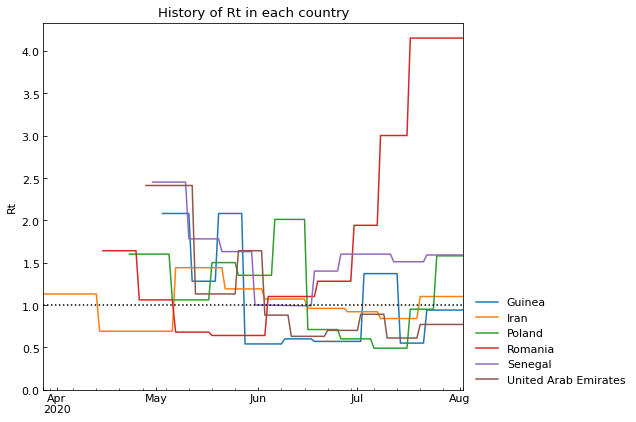

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-29,0.94,1.1,1.58,4.15,1.59,0.77
2020-07-30,0.94,1.1,1.58,4.15,1.59,0.77
2020-07-31,0.94,1.1,1.58,4.15,1.59,0.77
2020-08-01,0.94,1.1,1.58,4.15,1.59,0.77
2020-08-02,0.94,1.1,1.58,4.15,1.59,0.77


In [12]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

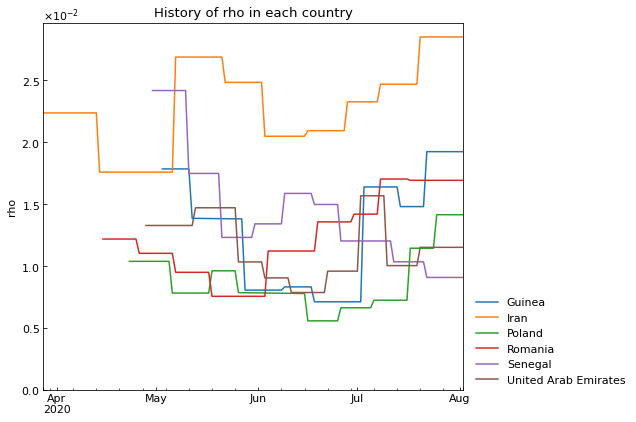

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-29,0.019242,0.028515,0.014145,0.016926,0.009074,0.011509
2020-07-30,0.019242,0.028515,0.014145,0.016926,0.009074,0.011509
2020-07-31,0.019242,0.028515,0.014145,0.016926,0.009074,0.011509
2020-08-01,0.019242,0.028515,0.014145,0.016926,0.009074,0.011509
2020-08-02,0.019242,0.028515,0.014145,0.016926,0.009074,0.011509


In [13]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

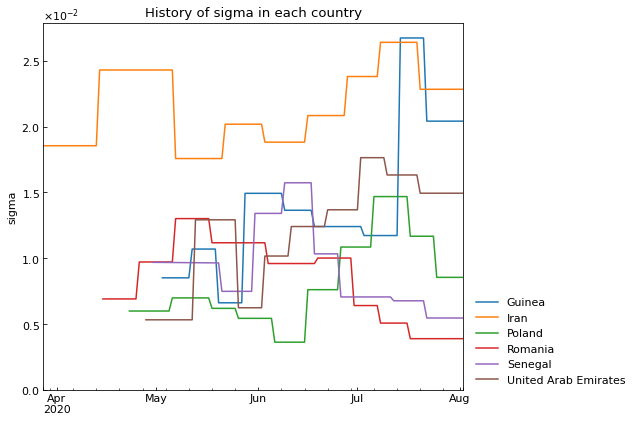

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-29,0.020411,0.022833,0.008539,0.003878,0.00545,0.014934
2020-07-30,0.020411,0.022833,0.008539,0.003878,0.00545,0.014934
2020-07-31,0.020411,0.022833,0.008539,0.003878,0.00545,0.014934
2020-08-01,0.020411,0.022833,0.008539,0.003878,0.00545,0.014934
2020-08-02,0.020411,0.022833,0.008539,0.003878,0.00545,0.014934


In [14]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

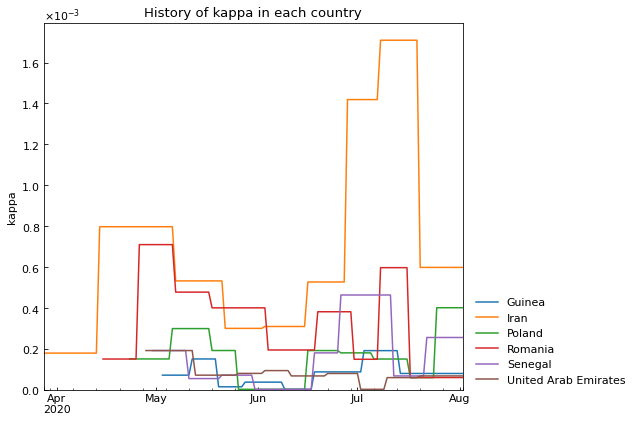

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-29,0.000079,0.000598,0.000401,0.000059,0.000255,0.000067
2020-07-30,0.000079,0.000598,0.000401,0.000059,0.000255,0.000067
2020-07-31,0.000079,0.000598,0.000401,0.000059,0.000255,0.000067
2020-08-01,0.000079,0.000598,0.000401,0.000059,0.000255,0.000067
2020-08-02,0.000079,0.000598,0.000401,0.000059,0.000255,0.000067


In [15]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

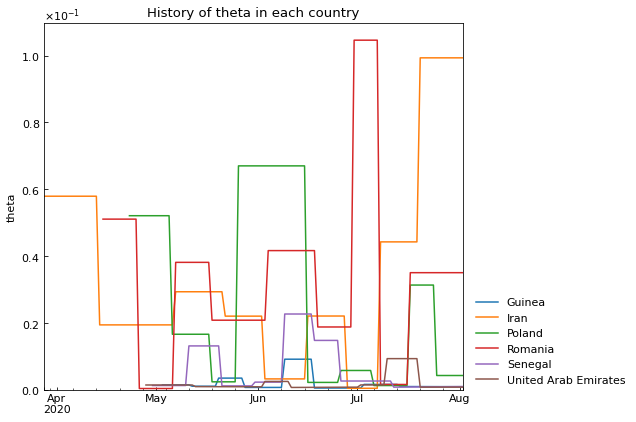

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-29,0.000898,0.099356,0.004249,0.035034,0.000938,0.000764
2020-07-30,0.000898,0.099356,0.004249,0.035034,0.000938,0.000764
2020-07-31,0.000898,0.099356,0.004249,0.035034,0.000938,0.000764
2020-08-01,0.000898,0.099356,0.004249,0.035034,0.000938,0.000764
2020-08-02,0.000898,0.099356,0.004249,0.035034,0.000938,0.000764


In [16]:
analyser.param_history("theta", roll_window=None).tail()